# Single node modeling example
We set up a 2D isotropic acoustic modeling operator for a single shot with the source located in the center of the model, and receivers located in a fixed array across the top of the model. 

In [3]:
using PyPlot, WaveFD, JetPackWaveFD, Random, MAT

In [4]:
file = matopen("SEAM_vp_100x100.mat")
v = read(file, "dataM")
close(file)
dz,dx = 50,50
nz,nx = size(v)
@show dz,dx
@show nz,nx;
v = convert(Array{Float32}, v);   # THIS line is important for the SEAM model, in our project we save everything in
                                  # Float64 format. 

(dz, dx) = (50, 50)
(nz, nx) = (151, 351)


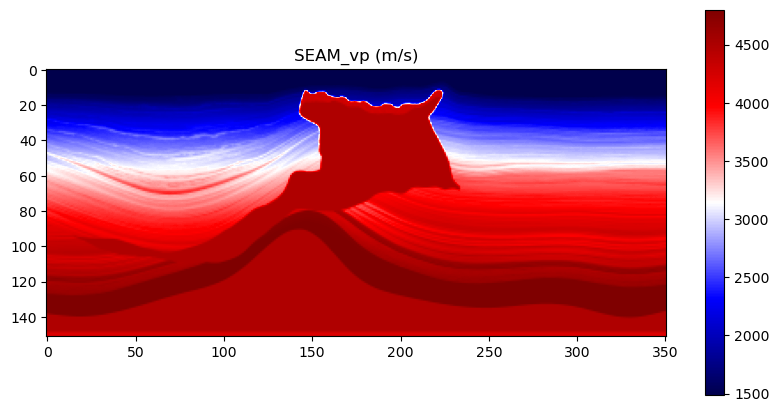

In [5]:
figure(figsize=(10,5)); clf()
imshow(v, aspect="1",cmap="seismic");
colorbar();
title("SEAM_vp (m/s)");

## Scratch directory
When dealing with serialized nonlinear wavefields as in this example, we need to specify the location where scratch files will be written.

You may need to change this to point to a temporary directory available on your system.

In [6]:
scratch = "scratch"
@assert isdir(scratch)

In [7]:
F = JopNlProp2DAcoIsoDenQ_DEO2_FDTD(;
    b = ones(Float32,size(v)),
    nthreads = Sys.CPU_THREADS,
    isinterior = true,
    ntrec = 1601,
    dtrec = 0.004,
    dtmod = 0.002,
    dz = dz,
    dx = dx,
    wavelet = WaveletCausalRicker(f=5.0),
    sx = dx*(nx/2),
    sz = dz,
    rx = dx*[0:0.5:nx-1;],
    rz = 2*dz*ones(length(0:0.5:nx-1)),
   # srcfieldfile = joinpath(scratch, "field-$(randstring()).bin"),
    reportinterval=1000)

"Jet nonlinear operator, (151, 351) → (1601, 701)"

In [8]:
time_beg = time()
d = F*v;

┌ Info: nonlinear forward on IG-A23078.local, srcfieldfile=/var/folders/_j/3fs4ygvd2v71nz8h1vlrhflw0000gq/T/field-9e309ed2-49f2-4ec7-85a7-9bd12b3556fb.bin
└ @ JetPackWaveFD /Users/pkmishra/.julia/packages/JetPackWaveFD/9vHWV/src/jop_prop2DAcoIsoDenQ_DEO2_FDTD.jl:398
┌ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time step  1000 of  3201   70.20 MCells/s (IO=13.38, EX=41.43, PR=41.31) -- rms d,p; 7.8215e+00 3.9654e+00
└ @ JetPackWaveFD /Users/pkmishra/.julia/packages/JetPackWaveFD/9vHWV/src/jop_prop2DAcoIsoDenQ_DEO2_FDTD.jl:738
┌ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time step  2000 of  3201   74.16 MCells/s (IO=13.72, EX=34.97, PR=37.71) -- rms d,p; 8.6926e+00 1.1408e+00
└ @ JetPackWaveFD /Users/pkmishra/.julia/packages/JetPackWaveFD/9vHWV/src/jop_prop2DAcoIsoDenQ_DEO2_FDTD.jl:738
┌ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time step  3000 of  3201   86.91 MCells/s (IO=15.84, EX=37.17, PR=35.78) -- rms d,p; 8.9063e+00 6.2393e-01
└ @ JetPackWaveFD /User

In [9]:
 #close the modeling operator, to remove seriliazation files
time_end = time()
ex_time = (time_end - time_beg)


8.323989152908325

In [10]:
close(F)

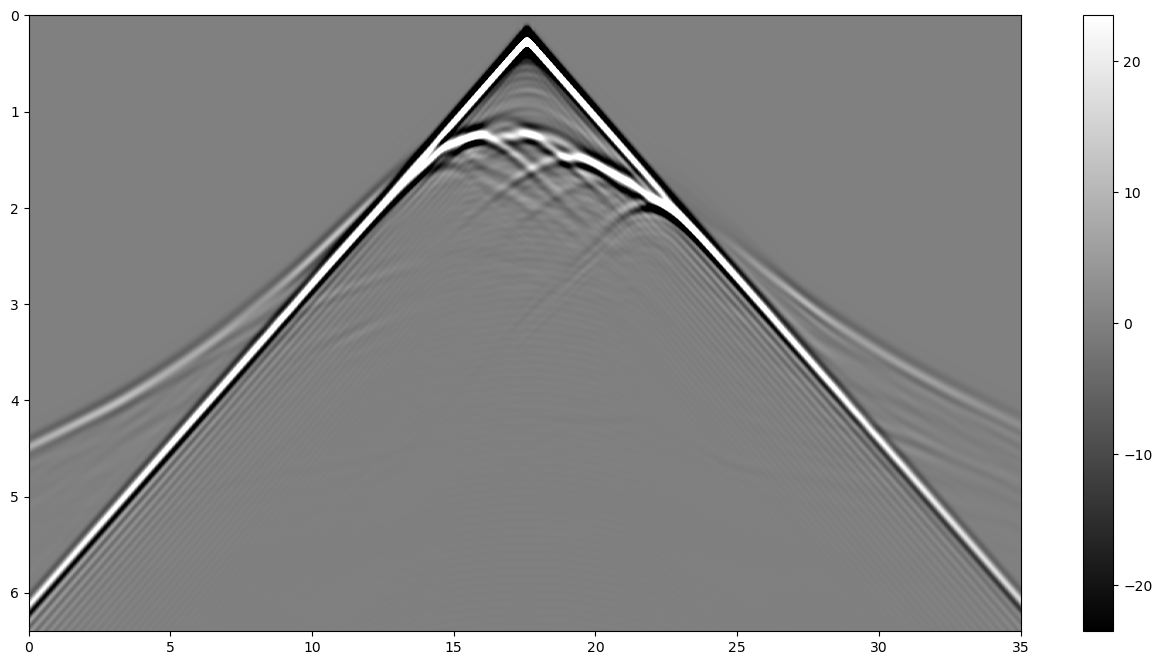

In [24]:
figure(figsize=(16,8)); clf()
imshow(d,aspect="auto", cmap="gray", extent=[0,35,6.4,0])
dmax = maximum(abs, d)
clim(0.05 .* [-dmax,+dmax])
colorbar();